In [9]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from keras.layers.core import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [10]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [11]:
train_dir = 'C:/Users/gianl/Desktop/train/'
val_dir = 'C:/Users/gianl/Desktop/val/'

img_height = 224
img_width = 224
batch_size = 32
num_classes = 2

In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode='rgb',
  label_mode='categorical',
  seed=1
  )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode='rgb',
  label_mode='categorical',
  seed=1
  )

Found 15401 files belonging to 2 classes.
Found 4571 files belonging to 2 classes.


In [13]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(img_height, img_width, 3),
                   pooling='avg',
                   classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(num_classes, activation='softmax'))

print(resnet_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [14]:
resnet_model.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = resnet_model.fit(train_ds, validation_data = val_ds, epochs=1)

482/482 [==============================] - 906s 2s/step - loss: 0.0594 - accuracy: 0.9875 - val_loss: 0.4072 - val_accuracy: 0.8956


In [19]:
resnet_model.save('./resnet_model')

#model = keras.models.load_model('./resnet_model')

INFO:tensorflow:Assets written to: ./resnet_model\assets


INFO:tensorflow:Assets written to: ./resnet_model\assets


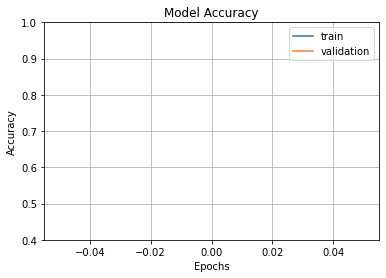

In [15]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [22]:
import cv2
image=cv2.imread('C:/Users/gianl/Desktop/val/shoot/_Boom_Snap_Clap__challenge_clap_u_nm_np1_fr_med_0/frame000022.jpg')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [17]:
pred = resnet_model.predict(image)
pred

1/1 [==============================] - 1s 956ms/step


array([[0.76507723, 0.23492277]], dtype=float32)

In [18]:
output_class=train_ds.class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is clap
